In [35]:
import re
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset
import transformers
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments, pipeline
from transformers.data.processors.utils import InputFeatures


In [9]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


#Model

##Uploading Model

In [4]:
!unzip /content/MarBert_Emotion2_tokenizer.zip

Archive:  /content/MarBert_Emotion2_tokenizer.zip
   creating: MarBert_Emotion2_tokenizer/
  inflating: MarBert_Emotion2_tokenizer/special_tokens_map.json  
  inflating: MarBert_Emotion2_tokenizer/tokenizer.json  
  inflating: MarBert_Emotion2_tokenizer/tokenizer_config.json  


In [6]:
import torch

# Load the entire model (architecture + weights)
SaudiBERT = torch.load('/content/Saudi_Bert_Dialect4.pt')
# Load the tokenizer
SaudiBERT_tokenizer = AutoTokenizer.from_pretrained("/content/Saudi_Bert_Dialect2_tokenizer")
# pipeline
SaudiBERT_pipeline = pipeline('text-classification', model=SaudiBERT, tokenizer=SaudiBERT_tokenizer)

<ipython-input-6-32f58a174944>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  SaudiBERT = torch.load('/content/Saudi_Bert_Dialect4.pt')
Hardware accelerator e.g. GPU is av

In [8]:
import torch

# Load the entire model (architecture + weights)
MarBERT = torch.load('/content/MarBert_Emotion4.pt')
# Load the tokenizer
MarBERT_tokenizer = AutoTokenizer.from_pretrained("/content/MarBert_Emotion2_tokenizer")
# pipeline
MarBERT_pipeline = pipeline('text-classification', model=MarBERT, tokenizer=MarBERT_tokenizer)

<ipython-input-8-59f5f3b40ca1>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  MarBERT = torch.load('/content/MarBert_Emotion4.pt')
Hardware accelerator e.g. GPU is availab

##Function

In [24]:
def predict(text):
  Emotion_predictions = MarBERT_pipeline(text)
  Dialect_predictions = SaudiBERT_pipeline(text)

  # Extract 'label' values from each dictionary in the lists
  emotion_labels = [pred['label'] for pred in Emotion_predictions]
  dialect_labels = [pred['label'] for pred in Dialect_predictions]

  # Combine the two predictions into a single array
  combined_predictions =list(zip(emotion_labels, dialect_labels))

  return combined_predictions

##Preprocessing function

In [45]:
import re
import pandas as pd

class TextProcessor:
    def __init__(self):
        self.arabic_diacritics_pattern = re.compile("[\u064B-\u065F\u0670\u0615-\u061A]")
        self.flag_mapping = {
        '🇦🇫': 'أفغانستان',
        '🇦🇱': 'ألبانيا',
        '🇩🇿': 'الجزائر',
        '🇦🇩': 'أندورا',
        '🇦🇴': 'أنغولا',
        '🇦🇬': 'أنتيغوا وبربودا',
        '🇦🇷': 'الأرجنتين',
        '🇦🇲': 'أرمينيا',
        '🇦🇼': 'أروبا',
        '🇦🇺': 'أستراليا',
        '🇦🇹': 'النمسا',
        '🇦🇿': 'أذربيجان',
        '🇧🇸': 'الباهاما',
        '🇧🇭': 'البحرين',
        '🇧🇩': 'بنغلاديش',
        '🇧🇧': 'بربادوس',
        '🇧🇾': 'بيلاروسيا',
        '🇧🇪': 'بلجيكا',
        '🇧🇿': 'بليز',
        '🇧🇯': 'بنين',
        '🇧🇹': 'بوتان',
        '🇧🇴': 'بوليفيا',
        '🇧🇦': 'البوسنة والهرسك',
        '🇧🇼': 'بوتسوانا',
        '🇧🇷': 'البرازيل',
        '🇧🇳': 'بروناي',
        '🇧🇬': 'بلغاريا',
        '🇧🇫': 'بوركينا فاسو',
        '🇧🇮': 'بوروندي',
        '🇰🇭': 'كمبوديا',
        '🇨🇲': 'الكاميرون',
        '🇨🇦': 'كندا',
        '🇨🇻': 'الرأس الأخضر',
        '🇰🇾': 'جزر كايمان',
        '🇨🇫': 'جمهورية أفريقيا الوسطى',
        '🇹🇩': 'تشاد',
        '🇨🇱': 'تشيلي',
        '🇨🇳': 'الصين',
        '🇨🇴': 'كولومبيا',
        '🇰🇲': 'جزر القمر',
        '🇨🇬': 'الكونغو - برازافيل',
        '🇨🇩': 'جمهورية الكونغو الديمقراطية',
        '🇨🇰': 'جزر كوك',
        '🇨🇷': 'كوستاريكا',
        '🇭🇷': 'كرواتيا',
        '🇨🇺': 'كوبا',
        '🇨🇾': 'قبرص',
        '🇨🇿': 'التشيك',
        '🇩🇰': 'الدانمارك',
        '🇩🇯': 'جيبوتي',
        '🇩🇲': 'دومينيكا',
        '🇩🇴': 'جمهورية الدومينيكان',
        '🇪🇨': 'الإكوادور',
        '🇪🇬': 'مصر',
        '🇸🇻': 'السلفادور',
        '🇬🇶': 'غينيا الاستوائية',
        '🇪🇷': 'إريتريا',
        '🇪🇪': 'إستونيا',
        '🇪🇹': 'إثيوبيا',
        '🇫🇯': 'فيجي',
        '🇫🇮': 'فنلندا',
        '🇫🇷': 'فرنسا',
        '🇬🇦': 'الغابون',
        '🇬🇲': 'غامبيا',
        '🇬🇪': 'جورجيا',
        '🇩🇪': 'ألمانيا',
        '🇬🇭': 'غانا',
        '🇬🇷': 'اليونان',
        '🇬🇩': 'غرينادا',
        '🇬🇹': 'غواتيمالا',
        '🇬🇳': 'غينيا',
        '🇬🇼': 'غينيا بيساو',
        '🇬🇾': 'غيانا',
        '🇭🇹': 'هايتي',
        '🇭🇳': 'هندوراس',
        '🇭🇺': 'المجر',
        '🇮🇸': 'أيسلندا',
        '🇮🇳': 'الهند',
        '🇮🇩': 'إندونيسيا',
        '🇮🇷': 'إيران',
        '🇮🇶': 'العراق',
        '🇮🇪': 'أيرلندا',
        '🇮🇱': 'إسرائيل',
        '🇮🇹': 'إيطاليا',
        '🇯🇲': 'جامايكا',
        '🇯🇵': 'اليابان',
        '🇯🇴': 'الأردن',
        '🇰🇿': 'كازاخستان',
        '🇰🇪': 'كينيا',
        '🇰🇮': 'كيريباتي',
        '🇽🇰': 'كوسوفو',
        '🇰🇼': 'الكويت',
        '🇰🇬': 'قيرغيزستان',
        '🇱🇦': 'لاوس',
        '🇱🇻': 'لاتفيا',
        '🇱🇧': 'لبنان',
        '🇱🇸': 'ليسوتو',
        '🇱🇷': 'ليبريا',
        '🇱🇾': 'ليبيا',
        '🇱🇮': 'ليختنشتاين',
        '🇱🇹': 'ليتوانيا',
        '🇱🇺': 'لوكسمبورغ',
        '🇲🇰': 'مقدونيا الشمالية',
        '🇲🇬': 'مدغشقر',
        '🇲🇼': 'مالاوي',
        '🇲🇾': 'ماليزيا',
        '🇲🇻': 'جزر المالديف',
        '🇲🇱': 'مالي',
        '🇲🇹': 'مالطا',
        '🇲🇭': 'جزر مارشال',
        '🇲🇷': 'موريتانيا',
        '🇲🇺': 'موريشيوس',
        '🇲🇽': 'المكسيك',
        '🇫🇲': 'ميكرونيزيا',
        '🇲🇩': 'مولدوفا',
        '🇲🇨': 'موناكو',
        '🇲🇳': 'منغوليا',
        '🇲🇪': 'الجبل الأسود',
        '🇲🇦': 'المغرب',
        '🇲🇿': 'موزمبيق',
        '🇲🇲': 'ميانمار',
        '🇳🇦': 'ناميبيا',
        '🇳🇷': 'ناورو',
        '🇳🇵': 'نيبال',
        '🇳🇱': 'هولندا',
        '🇳🇿': 'نيوزيلندا',
        '🇳🇮': 'نيكاراجوا',
        '🇳🇪': 'النيجر',
        '🇳🇬': 'نيجيريا',
        '🇰🇵': 'كوريا الشمالية',
        '🇳🇴': 'النرويج',
        '🇴🇴': 'جزر أورسي',
        '🇵🇰': 'باكستان',
        '🇵🇼': 'بالاو',
        '🇵🇸': 'فلسطين',
        '🇵🇦': 'بنما',
        '🇵🇬': 'بابوا غينيا الجديدة',
        '🇵🇾': 'باراغواي',
        '🇵🇪': 'بيرو',
        '🇵🇭': 'الفلبين',
        '🇵🇱': 'بولندا',
        '🇵🇹': 'البرتغال',
        '🇶🇦': 'قطر',
        '🇷🇴': 'رومانيا',
        '🇷🇺': 'روسيا',
        '🇷🇼': 'رواندا',
        '🇰🇳': 'سانت كيتس ونيفيس',
        '🇱🇨': 'سانت لوسيا',
        '🇻🇨': 'سانت فينسنت والغرينادين',
        '🇼🇸': 'ساموا',
        '🇸🇲': 'سان مارينو',
        '🇸🇹': 'ساو تومي وبرينسيبي',
        '🇸🇦': 'السعودية',
        '🇸🇳': 'السنغال',
        '🇷🇸': 'صربيا',
        '🇸🇨': 'سيشيل',
        '🇸🇱': 'سيراليون',
        '🇸🇬': 'سنغافورة',
        '🇸🇰': 'سلوفاكيا',
        '🇸🇮': 'سلوفينيا',
        '🇸🇧': 'جزر سليمان',
        '🇸🇴': 'الصومال',
        '🇿🇦': 'جنوب أفريقيا',
        '🇰🇷': 'كوريا الجنوبية',
        '🇸🇸': 'جنوب السودان',
        '🇪🇸': 'إسبانيا',
        '🇱🇰': 'سريلانكا',
        '🇸🇩': 'السودان',
        '🇸🇷': 'سورينام',
        '🇸🇿': 'سوازيلاند',
        '🇸🇪': 'السويد',
        '🇨🇭': 'سويسرا',
        '🇸🇾': 'سوريا',
        '🇹🇼': 'تايوان',
        '🇹🇯': 'طاجيكستان',
        '🇹🇿': 'تنزانيا',
        '🇹🇭': 'تايلاند',
        '🇹🇱': 'تيمور الشرقية',
        '🇹🇬': 'توغو',
        '🇹🇴': 'تونغا',
        '🇹🇹': 'ترينيداد وتوباغو',
        '🇹🇳': 'تونس',
        '🇹🇷': 'تركيا',
        '🇹🇲': 'تركمانستان',
        '🇹🇻': 'توفالو',
        '🇺🇬': 'أوغندا',
        '🇺🇦': 'أوكرانيا',
        '🇦🇪': 'الإمارات العربية المتحدة',
        '🇬🇧': 'المملكة المتحدة',
        '🇺🇸': 'الولايات المتحدة',
        '🇺🇾': 'أوروغواي',
        '🇺🇿': 'أوزبكستان',
        '🇻🇺': 'فانواتو',
        '🇻🇦': 'الفاتيكان',
        '🇻🇪': 'فنزويلا',
        '🇻🇳': 'فيتنام',
        '🇾🇪': 'اليمن',
        '🇿🇲': 'زامبيا',
        '🇿🇼': 'زيمبابوي',
    }
        self.emoji_dict = None

    def remove_arabic_diacritics(self, text):
        return self.arabic_diacritics_pattern.sub('', text)

    def remove_punc_characters(self, text):
        english_pattern = re.compile(r'[#@&%$!\(\)\{\}[\]:;.,،<>?؟`´''""\"''"""\[\]=+/\\|`''°~^*_-]')
        cleaned_text = re.sub(english_pattern, ' ', str(text))
        return cleaned_text

    def load_emoji_meanings(self):
      emoji_data = pd.read_csv("/content/emoji lexicon.csv", encoding='utf-8')
      self.emoji_dict = dict(zip(emoji_data['emoji'], emoji_data['Meaning']))

    def translate_emojis(self, text):
        if self.emoji_dict is None:
            raise ValueError("Emoji meanings have not been loaded. Call 'load_emoji_meanings' method first.")

        translated_text = ""
        for char in text:
            if char in self.emoji_dict:
                translated_text += self.emoji_dict[char] + " "
            else:
                translated_text += char
        return translated_text

    def replace_flags(self, text):
        for flag, country in self.flag_mapping.items():
            text = text.replace(flag, f"علم {country}")
        return text

    def remove_non_arabic_characters(self, text):

        arabic_pattern = re.compile(r'[^\u0600-\u06FF\s]+')
        cleaned_text = re.sub(arabic_pattern, '', text)
        return cleaned_text

    def remove_duplicate_characters(self, text):
        cleaned_text = re.sub(r'(.)\1{2,}', r'\1', text)
        return cleaned_text

    def preprocess_text(self, texts):
        if self.emoji_dict is None:
            self.load_emoji_meanings()

        processed_texts = []
        for text in texts:
            # Remove Arabic diacritics
            text = self.remove_arabic_diacritics(text)
            # Removing Punctuations
            text = self.remove_punc_characters(text)
            # Translate emoji
            text = self.translate_emojis(text)
            # Replace flag
            text = self.replace_flags(text)
            # Remove no Arabic characters
            text = self.remove_non_arabic_characters(text)
            # Remove duplicate characters
            text = self.remove_duplicate_characters(text)
            processed_texts.append(text)

        return processed_texts

#Validation

In [10]:
def validate_and_process_texts(texts):
    removedTexts = []
    validtexts = []
    if len(texts) > 1:
        for index, text in enumerate(texts):
            if not contains_arabic(text):
                print(f"Text {index + 1} is not valid: {text}")
                removedTexts.append(index)
            else:
                validtexts.append(text)
        return validtexts, removedTexts
    else:
        if not contains_arabic(texts):
            print("Text is not valid.")
            texts = []
            return texts, removedTexts
        return texts, removedTexts

def contains_arabic(text):
    return any('\u0600' <= ch <= '\u06FF' or '\u0750' <= ch <= '\u077F' or '\u08A0' <= ch <= '\u08FF' for ch in text)

#Showing the result

In [65]:
import matplotlib.pyplot as plt

def percentage(result):
  NumberResult = len(result)
  HAngerCount, HSadCount, HSurprisCount, HNeutralCount, HFearCount, HDisgustCount, HSarcasmCount, HhappyCount = 0, 0, 0, 0, 0, 0, 0, 0
  SAngerCount, SSadCount, SSurprisCount, SNeutralCount, SFearCount, SDisgustCount, SSarcasmCount, ShappyCount = 0, 0, 0, 0, 0, 0, 0, 0
  WAngerCount, WSadCount, WSurprisCount, WNeutralCount, WFearCount, WDisgustCount, WSarcasmCount, WhappyCount = 0, 0, 0, 0, 0, 0, 0, 0
  AngerCount, SadCount, SurprisCount, NeutralCount, FearCount, DisgustCount, SarcasmCount, happyCount = 0, 0, 0, 0, 0, 0, 0, 0
  HCount,WCount,SCount=0, 0, 0
  counter=0

  for i in range(NumberResult):
    if result[i][1] == "H":
      HCount+=1
    elif result[i][1] == "W":
      WCount+=1
    elif result[i][1] == "S":
      SCount+=1

  for i in range(NumberResult):
    if result[i][0] == "surprise":
      SurprisCount+=1
    elif result[i][0] == "happiness":
      happyCount+=1
    elif result[i][0] == "anger":
      AngerCount+=1
    elif result[i][0] == "sadness":
      SadCount+=1
    elif result[i][0] == "Neutral":
      NeutralCount+=1
    elif result[i][0] == "fear":
      FearCount+=1
    elif result[i][0] == "disgust":
      DisgustCount+=1
    elif result[i][0] == "sarcasm":
      SarcasmCount+=1

  for i in range(NumberResult):
    if result[i][0] == "surprise" and result[i][1] == "H":
      HSurprisCount+=1
    elif result[i][0] == "happiness" and result[i][1] == "H":
      happyCount+=1
    elif result[i][0] == "anger" and result[i][1] == "H":
      HAngerCount+=1
    elif result[i][0] == "sadness" and result[i][1] == "H":
      HSadCount+=1
    elif result[i][0] == "Neutral" and result[i][1] == "H":
      HNeutralCount+=1
    elif result[i][0] == "fear" and result[i][1] == "H":
      HFearCount+=1
    elif result[i][0] == "disgust" and result[i][1] == "H":
      HDisgustCount+=1
    elif result[i][0] == "sarcasm" and result[i][1] == "H":
      HSarcasmCount+=1

    elif result[i][0] == "surprise" and result[i][1] == "S":
      SSurprisCount+=1
    elif result[i][0] == "happiness" and result[i][1] == "S":
      ShappyCount+=1
    elif result[i][0] == "anger" and result[i][1] == "S":
      SAngerCount+=1
    elif result[i][0] == "sadness" and result[i][1] == "S":
      SSadCount+=1
    elif result[i][0] == "Neutral" and result[i][1] == "S":
      SNeutralCount+=1
    elif result[i][0] == "fear" and result[i][1] == "S":
      SFearCount+=1
    elif result[i][0] == "disgust" and result[i][1] == "S":
      SDisgustCount+=1
    elif result[i][0] == "sarcasm" and result[i][1] == "S":
      SSarcasmCount+=1

    elif result[i][0] == "surprise" and result[i][1] == "W":
      WSurprisCount+=1
    elif result[i][0] == "happiness" and result[i][1] == "W":
      WhappyCount+=1
    elif result[i][0] == "anger" and result[i][1] == "W":
      WAngerCount+=1
    elif result[i][0] == "sadness" and result[i][1] == "W":
      WSadCount+=1
    elif result[i][0] == "Neutral" and result[i][1] == "W":
      WNeutralCount+=1
    elif result[i][0] == "fear" and result[i][1] == "W":
      WFearCount+=1
    elif result[i][0] == "disgust" and result[i][1] == "W":
      WDisgustCount+=1
    elif result[i][0] == "sarcasm" and result[i][1] == "W":
      WSarcasmCount+=1

  ##This will be showed in page: result.html in the first section
  print("happiness: ", happyCount)
  print("anger: ", AngerCount)
  print("sadness: ", SadCount)
  print("Neutral: ", NeutralCount)
  print("fear: ", FearCount)
  print("disgust: ", DisgustCount)
  print("sarcasm: ", SarcasmCount)
  print("surprise: ", SurprisCount)
  print("Hejazi: ", HCount)
  print("White: ", WCount)
  print("South: ", SCount)


  #computing the percentage for the Dialects
  HCount2 = (HCount/NumberResult)*100
  WCount2 = (WCount/NumberResult)*100
  SCount2 = (SCount/NumberResult)*100

  #computing the percentage for the emotions
  SurprisCount = (SurprisCount / NumberResult) * 100
  happyCount = (happyCount / NumberResult) * 100
  AngerCount = (AngerCount / NumberResult) * 100
  SadCount = (SadCount / NumberResult) * 100
  NeutralCount = (NeutralCount / NumberResult) * 100
  FearCount = (FearCount / NumberResult) * 100
  DisgustCount = (DisgustCount / NumberResult) * 100
  SarcasmCount = (SarcasmCount / NumberResult) * 100

  if SCount != 0:
    #computing the percentage for the emotions in South dialect
    SSurprisCount = (SSurprisCount / SCount) * 100
    ShappyCount = (ShappyCount / SCount) * 100
    SAngerCount = (SAngerCount / SCount) * 100
    SSadCount = (SSadCount / SCount) * 100
    SNeutralCount = (SNeutralCount / SCount) * 100
    SFearCount = (SFearCount / SCount) * 100
    SDisgustCount = (SDisgustCount / SCount) * 100
    SSarcasmCount = (SSarcasmCount / SCount) * 100

    ## South pie Chart ##This will be showed in page: result.html in the third section
    labels = ['anger', 'Neutral', 'sadness', 'fear', 'happiness', 'disgust', 'sarcasm', 'surprise']
    sizes = [SAngerCount, SNeutralCount, SSadCount, SFearCount, ShappyCount, SDisgustCount, SSarcasmCount, SSurprisCount]
    explode = (0.2, 0, 0, 0, 0, 0, 0, 0)
    fig = plt.figure(figsize=(10, 5))
    percent_labels = [f'{label} - {size:.1f}%' for label, size in zip(labels, sizes)]
    colors = plt.cm.Blues(np.linspace(0.2, 1, len(labels)))
    plt.pie(sizes, explode=explode, labels=None, startangle=140, colors=colors)
    plt.axis('equal')
    plt.title("Emotions in South Dialect")
    plt.legend(percent_labels, title="Dialects:", loc='center right')
    plt.show

  else:
    print("No South Dialect")
    # in the window you should make the pie chart in one color and print a text on the pie chart that says:
    #النصوص التي أدخلتها لا تحتوي على هذه اللهجة

  if HCount != 0:
    #computing the percentage for the emotions in Hejazi dialect
    HSurprisCount = (HSurprisCount / HCount) * 100
    HhappyCount = (HhappyCount / HCount) * 100
    HAngerCount = (HAngerCount / HCount) * 100
    HSadCount = (HSadCount / HCount) * 100
    HNeutralCount = (HNeutralCount / HCount) * 100
    HFearCount = (HFearCount / HCount) * 100
    HDisgustCount = (HDisgustCount / HCount) * 100
    HSarcasmCount = (HSarcasmCount / HCount) * 100

    ## Hejazi pie Chart ##This will be showed in page: result.html in the third section
    labels = ['anger', 'Neutral', 'sadness', 'fear', 'happiness', 'disgust', 'sarcasm', 'surprise']
    sizes = [HAngerCount, HNeutralCount, HSadCount, HFearCount, HhappyCount, HDisgustCount, HSarcasmCount, HSurprisCount]
    explode = (0.2, 0, 0, 0, 0, 0, 0, 0)
    fig = plt.figure(figsize=(10, 5))
    percent_labels = [f'{label} - {size:.1f}%' for label, size in zip(labels, sizes)]
    colors = plt.cm.Blues(np.linspace(0.2, 1, len(labels)))
    plt.pie(sizes, explode=explode, labels=None, startangle=140, colors=colors)
    plt.axis('equal')
    plt.title("Emotions in Hejazi Dialect")
    plt.legend(percent_labels, title="Dialects:", loc='center right')
    plt.show

  else:
    print("No Hejazi Dialect")
    # in the window you should make the pie chart in one color and print a text on the pie chart that says:
    #النصوص التي أدخلتها لا تحتوي على هذه اللهجة


  if WCount != 0:
    #computing the percentage for the emotions in White dialect
    WSurprisCount = (WSurprisCount / WCount) * 100
    WhappyCount = (WhappyCount / WCount) * 100
    WAngerCount = (WAngerCount / WCount) * 100
    WSadCount = (WSadCount / WCount) * 100
    WNeutralCount = (WNeutralCount / WCount) * 100
    WFearCount = (WFearCount / WCount) * 100
    WDisgustCount = (WDisgustCount / WCount) * 100
    WSarcasmCount = (WSarcasmCount / WCount) * 100

    ## White pie Chart ##This will be showed in page: result.html in the third section
    labels = ['anger', 'Neutral', 'sadness', 'fear', 'happiness', 'disgust', 'sarcasm', 'surprise']
    sizes = [WAngerCount, WNeutralCount, WSadCount, WFearCount, WhappyCount, WDisgustCount, WSarcasmCount, WSurprisCount]
    explode = (0.2, 0, 0, 0, 0, 0, 0, 0)
    fig = plt.figure(figsize=(10, 5))
    percent_labels = [f'{label} - {size:.1f}%' for label, size in zip(labels, sizes)]
    # Define custom blue colormap
    colors = plt.cm.Blues(np.linspace(0.2, 1, len(labels)))
    plt.pie(sizes, explode=explode, labels=None, startangle=140, colors=colors)
    plt.axis('equal')
    plt.title("Emotions in White Dialect")
    plt.legend(percent_labels, title="Dialects:", loc='center right')
    plt.show()

  else:
    print("No White Dialect")
    # in the window it should make the pie chart in one color and print a text on the pie chart that says:
    #النصوص التي أدخلتها لا تحتوي على هذه اللهجة


  #Dialect pie chart ##This will be showed in page: result.html in the second section
  labels = ['Hejazi','White','South']
  sizes = [HCount2, WCount2, SCount2]  # percentages
  #explode = (0.2, 0.3, 0.3)  # explode 1st slice
  explode = (0.2,0,0)
  fig = plt.figure(figsize=(10, 5))
  percent_labels = [f'{label} - {size:.1f}%' for label, size in zip(labels, sizes)]
  plt.pie(sizes, explode=explode, labels=None, startangle=140)
  plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.title("Dialects")
  plt.legend(percent_labels,title = "Dialects :",loc='center right')
  plt.show()




  #Emotions pie chart ##This will be showed in page: result.html in the second section
  labels = ['anger','Neutral','sadness','fear','happiness','disgust','sarcasm','suprise']
  sizes = [AngerCount, NeutralCount, SadCount, FearCount,happyCount,DisgustCount,SarcasmCount,SurprisCount]  # percentages
  #explode = (0.2, 0.3, 0.3, 0.3,0.3,0.3,0.3,0.2)  # explode 1st slice
  explode = (0.2,0,0,0,0,0,0,0)
  fig = plt.figure(figsize=(10, 5))
  percent_labels = [f'{label} - {size:.1f}%' for label, size in zip(labels, sizes)]
  plt.pie(sizes, explode=explode, labels=None, startangle=140)
  plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.legend(percent_labels,title = "Emotions :",loc='center right')
  plt.show()

#Input function

In [64]:
import csv

def input_text(egy):
    OldLength = len(egy)
    texts, removedTexts = validate_and_process_texts(egy)
    processor = TextProcessor()

    if len(texts) == 0:
      print("Try another text please. The text you entered is non-arabic")
    elif len(texts) == 1 and (OldLength == 1 or OldLength>1):
      processed_text = processor.preprocess_text(texts)
      results = predict(processed_text)

      #Here The result will be showed in page: first.html
      for i in len(results):
        print(texts[i], ": ",results[i][0], results[i][1])


    elif len(texts) < OldLength and OldLength > 1:
      print("Note: there are some texts that are invalid so they were not predicted.")
      processed_text = processor.preprocess_text(texts)
      results = predict(processed_text)
      #Here the result will be showed in page: result.html
      percentage(results)

    elif len(texts) == OldLength and OldLength > 1:
      processed_text = processor.preprocess_text(texts)
      results = predict(processed_text)
      #Here the result will be showed in page: result.html
      percentage(results)


#

#Demo

happiness:  0
anger:  0
sadness:  0
Neutral:  3
fear:  0
disgust:  0
sarcasm:  0
surprise:  0
Hejazi:  2
White:  1
South:  0
No South Dialect


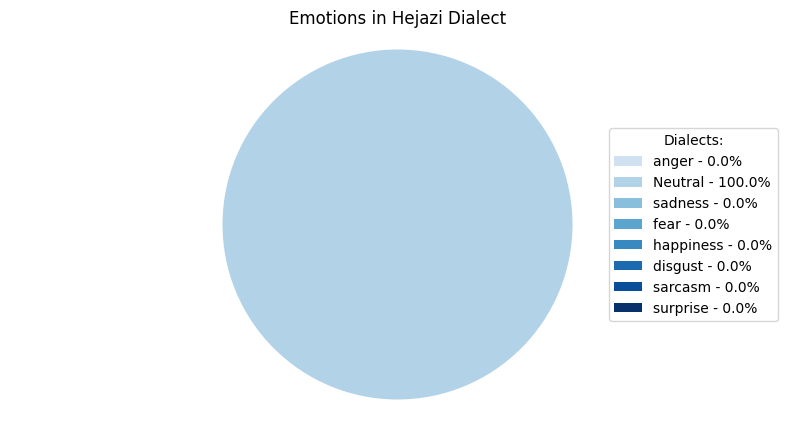

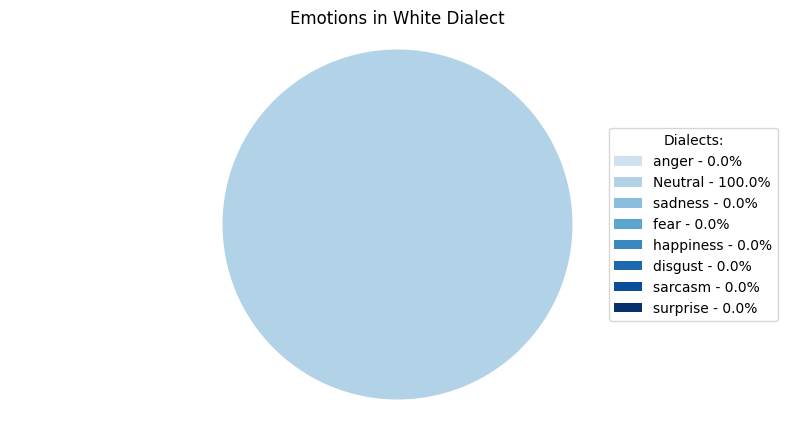

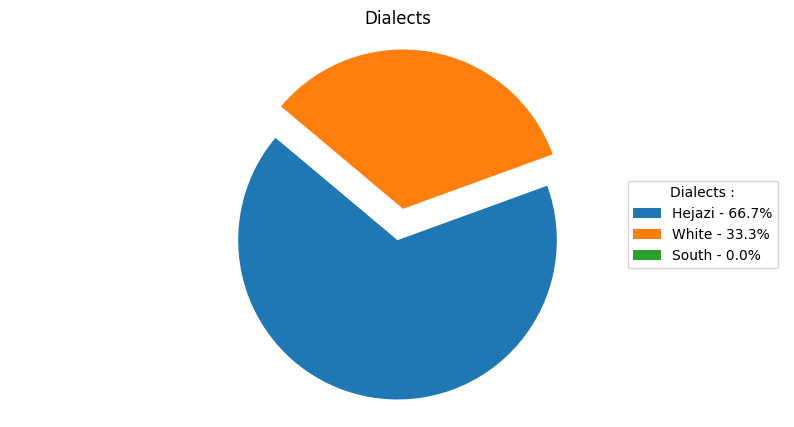

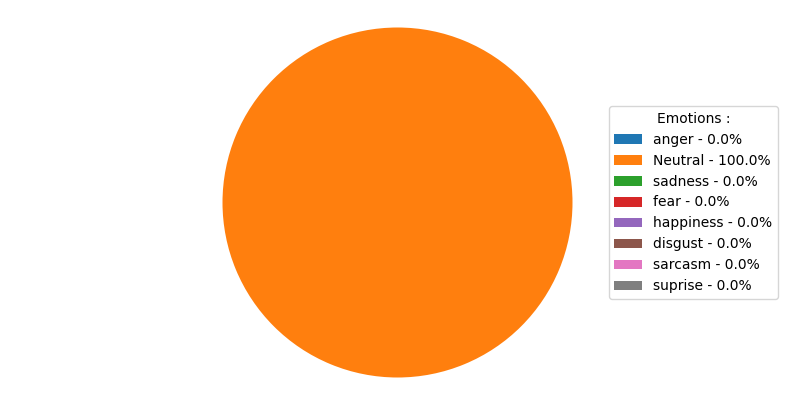

In [66]:
#This should happended in page : form.html
text = ["الحمدلله", "اهلا", " مرة زعلانة"]

result = input_text(text)


#**To understand the flow of the system check the input_text function and check every function that (input_text) calls**